In [1]:
from src.config import initialize

initialize()

/home/paulw/anaconda3/envs/exact/lib/python3.9/site-packages/pl_bolts/utils/warnings.py:30: UserWarning: You want to use `gym` which is not installed yet, install it with `pip install gym`.
  stdout_func(


In [2]:
import hydra
hydra.initialize('configs')

/tmp/ipykernel_11312/3272729642.py:2: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  hydra.initialize('configs')


hydra.initialize()

In [3]:
cfg = hydra.compose('config', ['experiment=01_TRUSFormer_reprod_PWilson_2023-01-19'])
cfg.driver.config.core_dm.splits.train_val_split_seed = 0 

In [4]:
splits = hydra.utils.instantiate(cfg.driver.config.core_dm.splits)

In [5]:
from src.data.exact.splits import InvolvementThresholdFilter
filter = InvolvementThresholdFilter(0.4)
splits.apply_filters(filter)

In [11]:
train = splits.get_train() 
val = splits.get_val()
test = splits.get_test()

In [12]:
from src.data.exact.resources import metadata
table = metadata()

In [17]:
table.split

AttributeError: 'DataFrame' object has no attribute 'split'

In [13]:
(table.query('core_specifier in @test or core_specifier in @train').grade == "Benign").value_counts()

True     743
False    436
Name: grade, dtype: int64

In [14]:
(table.query('core_specifier in @test or core_specifier in @val').grade == "Benign").value_counts()

True     336
False    198
Name: grade, dtype: int64

In [9]:
table.grade.value_counts()

Benign    5727
GS7        675
GS8        134
GS9         60
GS10        11
Name: grade, dtype: int64

In [26]:
from src.data.exact.core import Core
core = Core.sample_core()

core.get_patch_view()[0][0].shape

/home/paulw/projects/TRUSnet-1/src/data/exact/core.py:228: UserWarning: You appear to be calling Core constructor manually. It is preferable to call `Core.create_core(specifier)`
                    which will cache core instances and not double memory requirements for core objects!
                
  warn(


(445, 55)

In [27]:
445 * 4

1780

In [20]:
len(table)

6607

In [14]:
table.query('pct_cancer != pct_cancer or pct_cancer >= 40').grade.value_counts()

Benign    5727
GS7        382
GS8         79
GS9         46
GS10        11
Name: grade, dtype: int64

In [10]:
382 + 79 + 46 + 11

518

In [30]:
test_table = table.query('core_specifier in @test')

In [31]:
test_table.grade.value_counts()

Benign    199
GS7        75
GS8        28
GS9        13
Name: grade, dtype: int64

<AxesSubplot:xlabel='patient_specifier'>

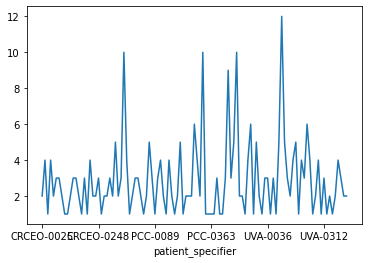

In [42]:
test_table.groupby('patient_specifier')['core_specifier'].count().plot()

In [34]:
len(test_table.patient_specifier.unique())

109

In [35]:
len(test_table)


315

In [32]:
199 + 75 + 28 + 13

315

In [20]:
train

['CRCEO-0004_LMM',
 'CRCEO-0004_RBL',
 'CRCEO-0004_RMM',
 'CRCEO-0006_RBM',
 'CRCEO-0008_RAM',
 'CRCEO-0008_RBL',
 'CRCEO-0012_LAL',
 'CRCEO-0012_LAM',
 'CRCEO-0012_RAM',
 'CRCEO-0012_RBL',
 'CRCEO-0012_RML',
 'CRCEO-0012_RMM',
 'CRCEO-0015_LMM',
 'CRCEO-0017_LML',
 'CRCEO-0017_LMM',
 'CRCEO-0017_RAL',
 'CRCEO-0019_RBM',
 'CRCEO-0024_LBM',
 'CRCEO-0024_RAL',
 'CRCEO-0028_LBL',
 'CRCEO-0028_LML',
 'CRCEO-0028_LMM',
 'CRCEO-0034_LAM',
 'CRCEO-0034_RAM',
 'CRCEO-0035_LBM',
 'CRCEO-0036_RBM',
 'CRCEO-0043_RAM',
 'CRCEO-0043_RBM',
 'CRCEO-0044_LAL',
 'CRCEO-0044_LML',
 'CRCEO-0044_RAM',
 'CRCEO-0045_LMM',
 'CRCEO-0045_RAL',
 'CRCEO-0045_RBM',
 'CRCEO-0047_LAL',
 'CRCEO-0047_LAM',
 'CRCEO-0047_LMM',
 'CRCEO-0047_RAL',
 'CRCEO-0047_RAM',
 'CRCEO-0047_RML',
 'CRCEO-0047_RMM',
 'CRCEO-0049_RAL',
 'CRCEO-0056_LAL',
 'CRCEO-0056_LAM',
 'CRCEO-0056_LBL',
 'CRCEO-0056_LBM',
 'CRCEO-0056_LML',
 'CRCEO-0056_LMM',
 'CRCEO-0056_RAM',
 'CRCEO-0056_RBL',
 'CRCEO-0056_RBM',
 'CRCEO-0056_RML',
 'CRCEO-0056

In [15]:
cfg.driver.config.patch_dm

In [ ]:
c